# LSTM


LSTM(Long Short-Term Memory)은 **순환신경망(RNN, Recurrent Neural Network)**의 일종으로, RNN의 단점인 **장기 의존성 문제**를 해결하기 위해 고안된 신경망 구조이다.

**LSTM의 주요 특징**
1. **장기 의존성(Long-Term Dependency) 처리**
   - 일반적인 RNN은 시간이 길어질수록 과거의 정보를 잘 기억하지 못하는 **기울기 소멸(Gradient Vanishing)** 문제가 발생한다.
   - LSTM은 **Cell State**와 **게이트 구조**를 통해 중요한 정보를 장기적으로 유지할 수 있다.

2. **게이트(Gates) 구조**
   - LSTM은 정보를 선택적으로 기억하거나 잊게 해주는 3가지 게이트로 구성된다:
     - **입력 게이트(Input Gate):** 새로운 정보를 얼마나 저장할지 결정한다.
     - **망각 게이트(Forget Gate):** 기존 정보를 얼마나 잊을지 결정한다.
     - **출력 게이트(Output Gate):** 현재 상태를 출력에 얼마나 반영할지 결정한다.

3. **Cell State**
   - 네트워크의 **기억 장치** 역할을 하며, 중요하지 않은 정보는 제거하고 중요한 정보는 유지한다.


**LSTM의 구조**

![](https://d.pr/i/iPf2jG+)

아래는 LSTM의 한 타임스텝(time step)에서 이루어지는 연산 과정이다:

1. **망각 게이트 (Forget Gate)**  
    * 이전 상태 $h_{t-1}$와 입력 $x_t$를 통해 제거할 정보를 결정한다.

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

2. **입력 게이트 (Input Gate)**
    - 입력 게이트 $i_t$와 새로운 정보 $\tilde{C}_t$를 결합하여 Cell State에 반영할 정보를 생성한다.
    
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

3. **Cell State 업데이트**  
    * 이전 Cell State $C_{t-1}$와 새로운 정보의 조합으로 현재 Cell State를 업데이트한다.

$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

    

4. **출력 게이트 (Output Gate)**  
    * 출력 게이트 $o_t$와 업데이트된 Cell State $C_t$를 통해 새로운 은닉 상태 $h_t$를 계산한다.
    
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

$$
h_t = o_t \cdot \tanh(C_t)
$$

**LSTM의 장점**

1. **장기 시퀀스 데이터 처리**: 시간의 흐름에 따라 발생하는 데이터를 잘 학습한다.
2. **텍스트, 음성, 시계열 데이터에 적합**: 언어 모델링, 번역, 주가 예측, 음성 인식 등 다양한 분야에서 활용된다.
3. **기울기 소멸 문제 해결**: Cell State와 게이트 구조 덕분에 학습이 안정적이다.

**추가 활용**

- **양방향 LSTM (Bidirectional LSTM)**: 양방향으로 데이터를 처리하여 더 많은 정보를 학습할 수 있다.
- **Stacked LSTM**: LSTM 레이어를 여러 층 쌓아 더 복잡한 패턴을 학습한다.

## LSTM 구조

In [1]:
# LSTM 입력/출력 텐서
import torch
import torch.nn as nn

batch_size = 2      # B : 한번에 처리할 샘플(문장) 개수
seq_len = 3         # T : 시퀀스 길이(Time Steps)
input_size = 4      # F : 각 시점이 입력 차원 (vocab_size 또는 임베딩 차원)
hidden_size = 5     # H : RNN의 은닉 상태 차원

x = torch.randn(batch_size, seq_len, input_size)    # 입력 시퀀스 텐서 생성 : (B,T,F)
print(x.shape)

# LSTM 생성 ((B, T, F) 형태로 입력을 받도록 설정)
lstm = nn.LSTM(input_size, hidden_size, batch_first=True) # 
output, (hidden, cell) = lstm(x)     # 순전파 : output(전체 시점 출력), hidden(마지막 은닉)

print(output.shape) # (B, T, H) : 모든 시점의 은닉 출력들이 쌓인 결과
print(hidden.shape) # (Num_layers, B, H)    : 마지막 시점 은닉 상태
print(cell.shape)   # (Num_layers, B, H)    : 마지막 시점 cel state

torch.Size([2, 3, 4])
torch.Size([2, 3, 5])
torch.Size([1, 2, 5])
torch.Size([1, 2, 5])


## IMDB 리뷰 감성분석
- IMDB 데이터는 영화 리뷰 텍스트와 그 리뷰의 감성(긍정/부정) 라벨로 구성된 이진 분류용 데이터셋
- 입력(X): 영화 리뷰 문장(원문 텍스트) → `tensorflow.keras.datasets.imdb`로 불러오면 “바로 모델에 넣어 실습할 수 있게” 미리 전처리된 형태(단어→정수 ID)로 제공
- 정답(y): 감성 라벨 0=부정, 1=긍정
- imdb.load_data(num_words=vocab_size)의 의미: 빈도 상위 vocab_size개 단어만 단어사전에 남기고, 나머지는(덜 나온 단어) 잘리거나 OOV로 처리되는 방식

- 결과적으로 **“영화 리뷰가 긍정인지 부정인지 맞추는 감성분류 데이터”**

In [2]:
from tensorflow.keras.datasets import imdb

vocab_size = 300            # 사용할 단어 사전 크기 (빈도 상위인 단어만 유지)

# IMDB 데이터 로드 (단어 ID 시퀀스 형태)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
print(X_train.shape, y_train.shape) # 학습 데이터 개수
print(X_test.shape, y_test.shape)   # 테스트 데이터 개수


c:\Users\Playdata\nlp\nlp_venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


(25000,) (25000,)
(25000,) (25000,)


### imdb 단어사전 생성 및 리뷰 디코드

In [3]:
# 단어사전 생성
from keras.datasets import imdb

word_index = imdb.get_word_index()  # IMDB 기본 단어사전 (word->index) 로드
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# 단어사전 생성
from keras.datasets import imdb

word_index = imdb.get_word_index()  # IMDB 기본 단어사전 (word->index) 로드

pad_token = 0       # 패딩 토큰
start_char = 1      # 문장 시작 토큰
oov_char = 2        # 사전에 없는 단어 (OOV_) 토큰
index_from = 2      # 실제 단어 인덱스 ~

# word_index(word->index)를 index->word 로 뒤집어서 생성
index_word = {
    index + index_from : word                   # {index+2:word}
    for word, index in word_index.items()       # (단어, 인덱스) 순회
    if index <= vocab_size                      # vocab_size 범위 내 단어만 사용
}
index_word[pad_token] = '[PAD]'                 # 0번 토큰 : 패딩
index_word[start_char] = '[START]'              # 1번 토큰 : 시작
index_word[oov_char] = '[OOV]'                  # 2번 토큰 : OOV

index_word = dict(sorted(index_word.items(), key=lambda item: item[0])) # key(ID)기준 정렬

list(index_word.items())[:10]   # (ID, word) 상위 10개

[(0, '[PAD]'),
 (1, '[START]'),
 (2, '[OOV]'),
 (3, 'the'),
 (4, 'and'),
 (5, 'a'),
 (6, 'of'),
 (7, 'to'),
 (8, 'is'),
 (9, 'br')]

In [5]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [6]:
# 단어 ID 시퀀스를 텍스트 리뷰로 디코딩
decoded_review = ' '.join(index_word.get(i, "?") for i in X_train[0])
decoded_review

"[START] that on as about [OOV] [OOV] [OOV] [OOV] really [OOV] [OOV] see [OOV] and again who each a are any about [OOV] life what [OOV] [OOV] br they [OOV] everything a though and part life look [OOV] [OOV] [OOV] like and part [OOV] [OOV] for [OOV] from this [OOV] and take what as of those [OOV] movie that on and [OOV] [OOV] [OOV] and on me because i as about [OOV] from been was this [OOV] and on for [OOV] for i as [OOV] with [OOV] a which [OOV] i is [OOV] is two a and [OOV] [OOV] as [OOV] see [OOV] by and still i as from [OOV] a are off good who scene some are [OOV] by of on i come he bad more a that [OOV] as into [OOV] is and films best [OOV] was each and [OOV] to [OOV] a [OOV] who me about [OOV] [OOV] his [OOV] [OOV] has to and [OOV] [OOV] this characters how and [OOV] was american too at [OOV] no his something of enough [OOV] with and bit on film say [OOV] his [OOV] a back one [OOV] with good who he there's made are characters and bit really as from [OOV] how i as actor a as [OOV] 

정확도가 중요하면 vocab_size를 늘린다.

In [7]:
# 메모리 사용량 조절 train_size, test_size
train_size = 15000  # 학습 샘프 수
test_size = 10000   # 테스트 샘플 수
X_train = X_train[:train_size]
y_train = y_train[:train_size]
X_test = X_test[:test_size]
y_test = y_test[:test_size]

print(X_train.shape, y_train.shape) # 학습 데이터 개수
print(X_test.shape, y_test.shape)   # 테스트 데이터 개수

(15000,) (15000,)
(10000,) (10000,)


In [8]:
# IMDB 시퀀스/라벨을 PyTorch Tensor로 변환
X_train = [torch.tensor(seq, dtype=torch.long) for seq in X_train]  # 학습 시퀀스(단어 ID 리스트) -> LongTensor로 변환
X_test = [torch.tensor(seq, dtype=torch.long) for seq in X_test]    # 테스트 시퀀스(단어 ID 리스트) -> LongTensor로 변환

y_train = torch.tensor(y_train, dtype=torch.float)  # 학습 라벨(0/1) -> FloatTensor로 변환
y_test = torch.tensor(y_test, dtype=torch.float)    # 테스트 라벨(0/1) -> FloatTensor로 변환

X_train[0], y_train[0]

(tensor([  1,  14,  22,  16,  43,   2,   2,   2,   2,  65,   2,   2,  66,   2,
           4, 173,  36, 256,   5,  25, 100,  43,   2, 112,  50,   2,   2,   9,
          35,   2, 284,   5, 150,   4, 172, 112, 167,   2,   2,   2,  39,   4,
         172,   2,   2,  17,   2,  38,  13,   2,   4, 192,  50,  16,   6, 147,
           2,  19,  14,  22,   4,   2,   2,   2,   4,  22,  71,  87,  12,  16,
          43,   2,  38,  76,  15,  13,   2,   4,  22,  17,   2,  17,  12,  16,
           2,  18,   2,   5,  62,   2,  12,   8,   2,   8, 106,   5,   4,   2,
           2,  16,   2,  66,   2,  33,   4, 130,  12,  16,  38,   2,   5,  25,
         124,  51,  36, 135,  48,  25,   2,  33,   6,  22,  12, 215,  28,  77,
          52,   5,  14,   2,  16,  82,   2,   8,   4, 107, 117,   2,  15, 256,
           4,   2,   7,   2,   5,   2,  36,  71,  43,   2,   2,  26,   2,   2,
          46,   7,   4,   2,   2,  13, 104,  88,   4,   2,  15, 297,  98,  32,
           2,  56,  26, 141,   6, 194,   2,  18,   4

In [9]:
# 시퀀스 패딩 처리로 길이 고정
import torch.nn.functional as F

seq_len = 100  # 고정할 시퀀스 길이 (패딩/자르기 기준)

# 시퀀스들을 max_len 길이로 패딩(0) 또는 자르기 텐서로 변환
def pad_sequences(sequences, max_len):
    padded_sequences = []           # 패딩 완료된 시퀀스를 모을 리스트
    for seq in sequences:           # 각 샘플(가변길이 시퀀스)순회
        if len(seq) < max_len:
            padded_seq = F.pad(seq, (0, max_len-len(seq)), value=0)     # 오른쪽에 0을 채워 길이 맞춤
        else :
            padded_seq = seq[:max_len]      # max_len보다 길면 앞부분 남긴다.
            
        padded_sequences.append(padded_seq)     # 결과 시퀀스 저장
        
    return torch.stack(padded_sequences)    # 리스트를 (N, max_len) 텐서로 스택

X_train_padded = pad_sequences(X_train, seq_len)    # 학습 데이터 시퀀스 길이 고정
X_test_padded = pad_sequences(X_test, seq_len)      # 테스트 데이터 시퀀스 길이 고정

X_train_padded.shape, X_test_padded.shape   # (샘플 수, seq_len) 형태

(torch.Size([15000, 100]), torch.Size([10000, 100]))

In [10]:
# 원-핫 인코딩으로 단어 ID를 벡터로 변환
X_train_onehot = F.one_hot(X_train_padded, num_classes=vocab_size)  # (N, seq_len) ID -> (N, seq_len, vocab_size) 원-핫
X_test_onehot = F.one_hot(X_test_padded, num_classes=vocab_size)    # 테스트 데이터 동일

X_train_onehot.shape, X_test_onehot.shape

(torch.Size([15000, 100, 300]), torch.Size([10000, 100, 300]))

In [11]:
# IMDB 감성분류 LSTM 모델
class SentimentNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(
            input_dim,     # 입력 feature 차원 (원-핫이면 vocab_size)
            hidden_dim,     # 은닉 상태 차원
            batch_first=True            # 입력 shape이 (B, T, F) 형태
        )
        self.fc = nn.Linear(hidden_dim,output_dim)  # 마지막 hidden ->  출력(logit)변환
        
    def forward(self,x):
        output, (hidden,cell) = self.lstm(x)                # output : (B,T,H), hidden/ cell:(1:layers_num,B,H)
        output=self.fc(hidden[-1])                  # 마지막 레이어 hidden (B,H) -> fc 적용
        return output                               # (B,output_dim) 반환
    
input_dim = vocab_size      # 원-핫 인코딩 feature 차원 = vocab_size
hidden_dim = 16              # RNN 은닉차원 수
output_dim = 1              # 이진 분류 출력(logit 1개)
    
model = SentimentNet(input_dim, hidden_dim, output_dim)
model

SentimentNet(
  (lstm): LSTM(300, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [12]:
# LSTM 모델 파라미터 (가중치/편향) 이름과 shape 확인
for name, param in model.named_parameters():
    print(name, param.shape)    # 파라미터 이름과 텐서 shape 출력

lstm.weight_ih_l0 torch.Size([64, 300])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [13]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델의 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentNet                             --
├─LSTM: 1-1                              20,352
├─Linear: 1-2                            17
Total params: 20,369
Trainable params: 20,369
Non-trainable params: 0

fc는 보통 Fully Connected Layer(전결합층)
- self.fc = nn.Linear(hidden_dim,output_dim)
    - LSTM에서 마지막 은닉벡터(크기 hidden_dim)을 최종 출력차원(output_dim)으로 바꿔주는 선형층

In [14]:
# 출력 라벨을 2차원 텐서로 변환
y_train = y_train.unsqueeze(1)      # (N,) -> (N, 1)로 차원 추가
y_test = y_test.unsqueeze(1)        # (N,) -> (N, 1)로 차원 추가

y_train.shape, y_test.shape

(torch.Size([15000, 1]), torch.Size([10000, 1]))

모델 출력이 (N, 1) 형태라서 라벨도 (N, 1)로 맞춰 손실계산

In [15]:
# 학습/검증 데이터 분리 및 DataLoader 구성
from torch.utils.data import random_split, DataLoader, TensorDataset

batch_size = 64                                 # 미니배치 크기
train_size = int(len(X_train_onehot)* 0.8)      # 학습 데이터 개수 (80%)
val_size = len(X_train_onehot) - train_size      # 검증 데이터 개수 (20%

# 학습/검증 데이터 셋 분리
train_dataset , val_dataset = random_split(TensorDataset(X_train_onehot, y_train), [train_size, val_size])
test_dataset = TensorDataset(X_test_onehot, y_test)     # 테스트 입력/라벨을 하나의 DataSet으로 묶음

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)   # 학습용 : 섞어서 배치 생성
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)      # 검증용 : 순서 유지
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)    # 테스트용 : 순서 유지

- random_split(TensorDataset(X_train_onehot, y_train), [train_size, val_size])
    - TensorDataset(X_train_onehot, y_train) : X_train_onehot[i], y_train[i]를 한 쌍으로 꺼내게 해주는 Dataset(샘플단위로 묶음)
    - random_split(dataset, [train_size, val_size]) : Dataset을 인덱스를 랜덤으로 섞어서 train_size(크기) 부분 + val_size(크기) 부분으로 나눔.
        - 반환값은 (train_dataset, val_dataset) 두개의 subnet 객체

    - 결과적으로는 (X,y)쌍으로 묶인 학습 데이터를 무작위로 "train,val"덩어리로 나눈다.

In [16]:
from tqdm import tqdm
import torch.optim as optim     # 최적화 알고리즘       (Adam 등)

# GPU 활용 가능시 GPU 기반으로 RNN 학습 루프(BCEWithLogits + Adam + Early Stopping)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

# 메모리 캐시 정리
torch.cuda.empty_cache()

model = model.to(device)

criterion = nn.BCEWithLogitsLoss()                      # 이진문류 손실 (시그모이드 포함 logit 입력용)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

epochs = 100

# 시각화를 위한 loss 기록
train_losses, val_losses, train_accs, val_accs = [], [], [], []

# 조기종료 관련
early_stopping_patience = 20
best_val_loss = float('inf')
early_stopping_counter = 0

for epoch in tqdm(range(epochs)):
    total_loss, correct, total = 0, 0, 0    # 누적 손실, 정답, 전체 샘플 수
    
    model.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device).float(), labels.to(device).float()
        
        optimizer.zero_grad()               # 이전 배치 기울기 초기화
        output = model(inputs)              # 순전파
        loss = criterion(output, labels)    # 손실계산
        loss.backward()                     # 역전파
        optimizer.step()                    # 파라미터 업데이트
        
        # 배치 로그
        total_loss += loss.item()                   # 배치 손실을 스칼라로 누적
        p = torch.sigmoid(output)                   # logit -> 0~1 확률로 변환
        pred = (p>=0.5).float()
        correct += (pred == labels).sum().item()    # 맞춘 개수
        total += labels.size(0)                     # 배치 샘플 수
    
    # 에폭 로그
    train_loss = total_loss / len(train_dataloader) # 에폭별 평균 학습 손실
    train_losses.append(train_loss)
    train_acc = correct/total
    train_accs.append(train_acc)
    
    # 검증
    model.eval()                                # 평가 모드 (Dropout, BN 비활성화)
    val_loss, val_correct, val_total = 0,0,0    # 누적 손실, 정답, 전체 샘플 수
    with torch.no_grad():                       # 기울기 계산 비활성화
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device).float(), val_labels.to(device).float()
            
            output = model(val_inputs)
            loss = criterion(output,val_labels)
            
            # 배치 로그
            val_loss += loss.item()
            p = torch.sigmoid(output)
            pred = (p>=0.5).float()
            val_correct += (pred == val_labels).sum().item()
            val_total += val_labels.size(0)
        
        # 에폭 로그
        val_loss = val_loss / len(val_dataloader)
        val_losses.append(val_loss)
        val_acc = val_correct/val_total
        val_accs.append(val_acc)
        
        # 에폭 로그 출력
        print(f"Epoch {epoch + 1}/{epochs}: Train Loss {train_loss:.4f} Train Acc {train_acc:.4f} Val loss {val_loss:4f} val acc {val_acc:4f}")
        
        # 조기 종료
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"Early stopped at Epoch {epoch +1}")
                break
            

device cpu


  1%|          | 1/100 [00:02<04:13,  2.57s/it]

Epoch 1/100: Train Loss 0.6933 Train Acc 0.5002 Val loss 0.693381 val acc 0.499667


  2%|▏         | 2/100 [00:05<04:05,  2.51s/it]

Epoch 2/100: Train Loss 0.6931 Train Acc 0.5052 Val loss 0.693208 val acc 0.506000


  3%|▎         | 3/100 [00:07<04:02,  2.50s/it]

Epoch 3/100: Train Loss 0.6929 Train Acc 0.5088 Val loss 0.693057 val acc 0.506667


  4%|▍         | 4/100 [00:09<03:59,  2.49s/it]

Epoch 4/100: Train Loss 0.6927 Train Acc 0.5149 Val loss 0.692893 val acc 0.507667


  5%|▌         | 5/100 [00:12<03:56,  2.49s/it]

Epoch 5/100: Train Loss 0.6925 Train Acc 0.5251 Val loss 0.692722 val acc 0.512667


  6%|▌         | 6/100 [00:15<04:08,  2.65s/it]

Epoch 6/100: Train Loss 0.6923 Train Acc 0.5277 Val loss 0.692527 val acc 0.515333


  7%|▋         | 7/100 [00:18<04:19,  2.79s/it]

Epoch 7/100: Train Loss 0.6920 Train Acc 0.5355 Val loss 0.692305 val acc 0.518000


  8%|▊         | 8/100 [00:21<04:28,  2.92s/it]

Epoch 8/100: Train Loss 0.6917 Train Acc 0.5391 Val loss 0.692039 val acc 0.519333


  9%|▉         | 9/100 [00:24<04:34,  3.02s/it]

Epoch 9/100: Train Loss 0.6913 Train Acc 0.5450 Val loss 0.691703 val acc 0.527000


 10%|█         | 10/100 [00:28<04:35,  3.06s/it]

Epoch 10/100: Train Loss 0.6907 Train Acc 0.5481 Val loss 0.691196 val acc 0.524667


 11%|█         | 11/100 [00:31<04:33,  3.07s/it]

Epoch 11/100: Train Loss 0.6899 Train Acc 0.5439 Val loss 0.690167 val acc 0.534667


 12%|█▏        | 12/100 [00:34<04:32,  3.09s/it]

Epoch 12/100: Train Loss 0.6864 Train Acc 0.5553 Val loss 0.679994 val acc 0.564333


 13%|█▎        | 13/100 [00:37<04:20,  3.00s/it]

Epoch 13/100: Train Loss 0.6710 Train Acc 0.6044 Val loss 0.665947 val acc 0.608667


 14%|█▍        | 14/100 [00:40<04:19,  3.01s/it]

Epoch 14/100: Train Loss 0.6649 Train Acc 0.6152 Val loss 0.661796 val acc 0.615667


 15%|█▌        | 15/100 [00:43<04:13,  2.98s/it]

Epoch 15/100: Train Loss 0.6573 Train Acc 0.6282 Val loss 0.657688 val acc 0.619667


 16%|█▌        | 16/100 [00:45<04:08,  2.96s/it]

Epoch 16/100: Train Loss 0.6542 Train Acc 0.6275 Val loss 0.655714 val acc 0.622667


 17%|█▋        | 17/100 [00:48<04:00,  2.90s/it]

Epoch 17/100: Train Loss 0.6484 Train Acc 0.6404 Val loss 0.649126 val acc 0.635667


 18%|█▊        | 18/100 [00:51<03:49,  2.80s/it]

Epoch 18/100: Train Loss 0.6446 Train Acc 0.6446 Val loss 0.645519 val acc 0.641667


 19%|█▉        | 19/100 [00:53<03:38,  2.70s/it]

Epoch 19/100: Train Loss 0.6398 Train Acc 0.6506 Val loss 0.640557 val acc 0.648000


 20%|██        | 20/100 [00:56<03:32,  2.66s/it]

Epoch 20/100: Train Loss 0.6337 Train Acc 0.6605 Val loss 0.634625 val acc 0.650667


 21%|██        | 21/100 [00:58<03:29,  2.65s/it]

Epoch 21/100: Train Loss 0.6282 Train Acc 0.6676 Val loss 0.631362 val acc 0.654333


 22%|██▏       | 22/100 [01:01<03:28,  2.67s/it]

Epoch 22/100: Train Loss 0.6245 Train Acc 0.6705 Val loss 0.627786 val acc 0.658000


 23%|██▎       | 23/100 [01:04<03:30,  2.74s/it]

Epoch 23/100: Train Loss 0.6205 Train Acc 0.6765 Val loss 0.624027 val acc 0.670333


 24%|██▍       | 24/100 [01:07<03:21,  2.65s/it]

Epoch 24/100: Train Loss 0.6188 Train Acc 0.6725 Val loss 0.620475 val acc 0.666000


 25%|██▌       | 25/100 [01:09<03:16,  2.62s/it]

Epoch 25/100: Train Loss 0.6121 Train Acc 0.6853 Val loss 0.620585 val acc 0.668000


 26%|██▌       | 26/100 [01:12<03:14,  2.63s/it]

Epoch 26/100: Train Loss 0.6079 Train Acc 0.6865 Val loss 0.628596 val acc 0.671333


 27%|██▋       | 27/100 [01:14<03:09,  2.59s/it]

Epoch 27/100: Train Loss 0.6088 Train Acc 0.6864 Val loss 0.610827 val acc 0.683667


 28%|██▊       | 28/100 [01:17<03:08,  2.61s/it]

Epoch 28/100: Train Loss 0.6017 Train Acc 0.6920 Val loss 0.646514 val acc 0.618333


 29%|██▉       | 29/100 [01:19<03:03,  2.58s/it]

Epoch 29/100: Train Loss 0.6101 Train Acc 0.6811 Val loss 0.607418 val acc 0.682667


 30%|███       | 30/100 [01:22<03:03,  2.62s/it]

Epoch 30/100: Train Loss 0.5957 Train Acc 0.6945 Val loss 0.609701 val acc 0.685667


 31%|███       | 31/100 [01:25<03:04,  2.67s/it]

Epoch 31/100: Train Loss 0.5930 Train Acc 0.7007 Val loss 0.602780 val acc 0.687667


 32%|███▏      | 32/100 [01:28<03:04,  2.72s/it]

Epoch 32/100: Train Loss 0.5961 Train Acc 0.6943 Val loss 0.601008 val acc 0.689667


 33%|███▎      | 33/100 [01:30<02:56,  2.63s/it]

Epoch 33/100: Train Loss 0.5900 Train Acc 0.7017 Val loss 0.622358 val acc 0.658000


 34%|███▍      | 34/100 [01:33<02:57,  2.69s/it]

Epoch 34/100: Train Loss 0.5880 Train Acc 0.7051 Val loss 0.597941 val acc 0.687667


 35%|███▌      | 35/100 [01:36<02:52,  2.65s/it]

Epoch 35/100: Train Loss 0.5929 Train Acc 0.6933 Val loss 0.594611 val acc 0.692667


 36%|███▌      | 36/100 [01:38<02:52,  2.69s/it]

Epoch 36/100: Train Loss 0.5817 Train Acc 0.7097 Val loss 0.603065 val acc 0.694000


 37%|███▋      | 37/100 [01:41<02:49,  2.69s/it]

Epoch 37/100: Train Loss 0.5788 Train Acc 0.7132 Val loss 0.592022 val acc 0.698000


 38%|███▊      | 38/100 [01:44<02:46,  2.68s/it]

Epoch 38/100: Train Loss 0.5777 Train Acc 0.7099 Val loss 0.590526 val acc 0.697000


 39%|███▉      | 39/100 [01:46<02:42,  2.66s/it]

Epoch 39/100: Train Loss 0.5734 Train Acc 0.7150 Val loss 0.588075 val acc 0.700333


 40%|████      | 40/100 [01:49<02:35,  2.60s/it]

Epoch 40/100: Train Loss 0.5731 Train Acc 0.7159 Val loss 0.585719 val acc 0.702000


 41%|████      | 41/100 [01:51<02:30,  2.55s/it]

Epoch 41/100: Train Loss 0.5746 Train Acc 0.7123 Val loss 0.583448 val acc 0.707667


 42%|████▏     | 42/100 [01:54<02:28,  2.56s/it]

Epoch 42/100: Train Loss 0.5677 Train Acc 0.7188 Val loss 0.583265 val acc 0.703000


 43%|████▎     | 43/100 [01:56<02:24,  2.53s/it]

Epoch 43/100: Train Loss 0.5646 Train Acc 0.7218 Val loss 0.581950 val acc 0.708000


 44%|████▍     | 44/100 [01:59<02:21,  2.52s/it]

Epoch 44/100: Train Loss 0.5619 Train Acc 0.7232 Val loss 0.587381 val acc 0.705667


 45%|████▌     | 45/100 [02:01<02:17,  2.50s/it]

Epoch 45/100: Train Loss 0.5621 Train Acc 0.7233 Val loss 0.575951 val acc 0.713000


 46%|████▌     | 46/100 [02:04<02:15,  2.51s/it]

Epoch 46/100: Train Loss 0.5572 Train Acc 0.7287 Val loss 0.574221 val acc 0.711333


 47%|████▋     | 47/100 [02:06<02:15,  2.56s/it]

Epoch 47/100: Train Loss 0.5565 Train Acc 0.7286 Val loss 0.585855 val acc 0.710667


 48%|████▊     | 48/100 [02:09<02:14,  2.59s/it]

Epoch 48/100: Train Loss 0.5636 Train Acc 0.7197 Val loss 0.573709 val acc 0.707667


 49%|████▉     | 49/100 [02:12<02:13,  2.62s/it]

Epoch 49/100: Train Loss 0.5575 Train Acc 0.7260 Val loss 0.569469 val acc 0.714667


 50%|█████     | 50/100 [02:14<02:11,  2.64s/it]

Epoch 50/100: Train Loss 0.5505 Train Acc 0.7312 Val loss 0.567519 val acc 0.715000


 51%|█████     | 51/100 [02:17<02:09,  2.64s/it]

Epoch 51/100: Train Loss 0.5485 Train Acc 0.7333 Val loss 0.569414 val acc 0.718667


 52%|█████▏    | 52/100 [02:20<02:07,  2.66s/it]

Epoch 52/100: Train Loss 0.5465 Train Acc 0.7344 Val loss 0.564294 val acc 0.716333


 53%|█████▎    | 53/100 [02:22<02:04,  2.65s/it]

Epoch 53/100: Train Loss 0.5472 Train Acc 0.7336 Val loss 0.566158 val acc 0.719667


 54%|█████▍    | 54/100 [02:25<02:07,  2.77s/it]

Epoch 54/100: Train Loss 0.5438 Train Acc 0.7357 Val loss 0.561619 val acc 0.719333


 55%|█████▌    | 55/100 [02:28<02:05,  2.80s/it]

Epoch 55/100: Train Loss 0.5434 Train Acc 0.7362 Val loss 0.559461 val acc 0.724333


 56%|█████▌    | 56/100 [02:31<02:06,  2.87s/it]

Epoch 56/100: Train Loss 0.5398 Train Acc 0.7377 Val loss 0.560449 val acc 0.720667


 57%|█████▋    | 57/100 [02:34<02:01,  2.84s/it]

Epoch 57/100: Train Loss 0.5376 Train Acc 0.7372 Val loss 0.558461 val acc 0.723000


 58%|█████▊    | 58/100 [02:37<01:55,  2.75s/it]

Epoch 58/100: Train Loss 0.5356 Train Acc 0.7381 Val loss 0.556815 val acc 0.723000


 59%|█████▉    | 59/100 [02:39<01:49,  2.67s/it]

Epoch 59/100: Train Loss 0.5353 Train Acc 0.7385 Val loss 0.555465 val acc 0.730000


 60%|██████    | 60/100 [02:42<01:47,  2.69s/it]

Epoch 60/100: Train Loss 0.5342 Train Acc 0.7387 Val loss 0.554236 val acc 0.729333


 61%|██████    | 61/100 [02:45<01:45,  2.70s/it]

Epoch 61/100: Train Loss 0.5349 Train Acc 0.7393 Val loss 0.550742 val acc 0.728333


 62%|██████▏   | 62/100 [02:47<01:43,  2.71s/it]

Epoch 62/100: Train Loss 0.5297 Train Acc 0.7429 Val loss 0.551849 val acc 0.727667


 63%|██████▎   | 63/100 [02:50<01:39,  2.68s/it]

Epoch 63/100: Train Loss 0.5298 Train Acc 0.7401 Val loss 0.549128 val acc 0.731000


 64%|██████▍   | 64/100 [02:53<01:36,  2.67s/it]

Epoch 64/100: Train Loss 0.5274 Train Acc 0.7422 Val loss 0.550131 val acc 0.731667


 65%|██████▌   | 65/100 [02:55<01:32,  2.63s/it]

Epoch 65/100: Train Loss 0.5271 Train Acc 0.7438 Val loss 0.550589 val acc 0.724000


 66%|██████▌   | 66/100 [02:58<01:29,  2.62s/it]

Epoch 66/100: Train Loss 0.5263 Train Acc 0.7413 Val loss 0.548261 val acc 0.730667


 67%|██████▋   | 67/100 [03:01<01:27,  2.67s/it]

Epoch 67/100: Train Loss 0.5283 Train Acc 0.7412 Val loss 0.546777 val acc 0.729667


 68%|██████▊   | 68/100 [03:03<01:26,  2.71s/it]

Epoch 68/100: Train Loss 0.5245 Train Acc 0.7440 Val loss 0.547073 val acc 0.729000


 69%|██████▉   | 69/100 [03:06<01:25,  2.75s/it]

Epoch 69/100: Train Loss 0.5221 Train Acc 0.7458 Val loss 0.544027 val acc 0.731333


 70%|███████   | 70/100 [03:09<01:23,  2.77s/it]

Epoch 70/100: Train Loss 0.5238 Train Acc 0.7416 Val loss 0.545233 val acc 0.729667


 71%|███████   | 71/100 [03:12<01:18,  2.71s/it]

Epoch 71/100: Train Loss 0.5207 Train Acc 0.7456 Val loss 0.545053 val acc 0.729333


 72%|███████▏  | 72/100 [03:14<01:14,  2.68s/it]

Epoch 72/100: Train Loss 0.5202 Train Acc 0.7454 Val loss 0.546680 val acc 0.729000


 73%|███████▎  | 73/100 [03:17<01:12,  2.70s/it]

Epoch 73/100: Train Loss 0.5212 Train Acc 0.7460 Val loss 0.542224 val acc 0.732667


 74%|███████▍  | 74/100 [03:19<01:08,  2.63s/it]

Epoch 74/100: Train Loss 0.5193 Train Acc 0.7482 Val loss 0.542165 val acc 0.733667


 75%|███████▌  | 75/100 [03:22<01:05,  2.63s/it]

Epoch 75/100: Train Loss 0.5178 Train Acc 0.7483 Val loss 0.540363 val acc 0.731333


 76%|███████▌  | 76/100 [03:25<01:04,  2.71s/it]

Epoch 76/100: Train Loss 0.5174 Train Acc 0.7480 Val loss 0.540668 val acc 0.736667


 77%|███████▋  | 77/100 [03:28<01:06,  2.87s/it]

Epoch 77/100: Train Loss 0.5161 Train Acc 0.7495 Val loss 0.539508 val acc 0.730667


 78%|███████▊  | 78/100 [03:31<01:01,  2.79s/it]

Epoch 78/100: Train Loss 0.5161 Train Acc 0.7492 Val loss 0.539981 val acc 0.733667


 79%|███████▉  | 79/100 [03:33<00:57,  2.73s/it]

Epoch 79/100: Train Loss 0.5154 Train Acc 0.7492 Val loss 0.539218 val acc 0.731000


 80%|████████  | 80/100 [03:36<00:54,  2.74s/it]

Epoch 80/100: Train Loss 0.5141 Train Acc 0.7490 Val loss 0.546259 val acc 0.726333


 81%|████████  | 81/100 [03:39<00:52,  2.75s/it]

Epoch 81/100: Train Loss 0.5144 Train Acc 0.7523 Val loss 0.539661 val acc 0.732333


 82%|████████▏ | 82/100 [03:42<00:49,  2.77s/it]

Epoch 82/100: Train Loss 0.5129 Train Acc 0.7526 Val loss 0.538871 val acc 0.734333


 83%|████████▎ | 83/100 [03:44<00:46,  2.71s/it]

Epoch 83/100: Train Loss 0.5126 Train Acc 0.7503 Val loss 0.543360 val acc 0.729333


 84%|████████▍ | 84/100 [03:47<00:42,  2.64s/it]

Epoch 84/100: Train Loss 0.5127 Train Acc 0.7510 Val loss 0.538133 val acc 0.737667


 85%|████████▌ | 85/100 [03:49<00:39,  2.65s/it]

Epoch 85/100: Train Loss 0.5119 Train Acc 0.7518 Val loss 0.536690 val acc 0.734333


 86%|████████▌ | 86/100 [03:52<00:36,  2.64s/it]

Epoch 86/100: Train Loss 0.5116 Train Acc 0.7508 Val loss 0.539618 val acc 0.734333


 87%|████████▋ | 87/100 [03:55<00:34,  2.62s/it]

Epoch 87/100: Train Loss 0.5114 Train Acc 0.7477 Val loss 0.537730 val acc 0.736000


 88%|████████▊ | 88/100 [03:57<00:31,  2.65s/it]

Epoch 88/100: Train Loss 0.5095 Train Acc 0.7514 Val loss 0.535779 val acc 0.737000


 89%|████████▉ | 89/100 [04:00<00:29,  2.65s/it]

Epoch 89/100: Train Loss 0.5095 Train Acc 0.7520 Val loss 0.535674 val acc 0.735667


 90%|█████████ | 90/100 [04:03<00:27,  2.70s/it]

Epoch 90/100: Train Loss 0.5089 Train Acc 0.7506 Val loss 0.536899 val acc 0.735667


 91%|█████████ | 91/100 [04:05<00:24,  2.69s/it]

Epoch 91/100: Train Loss 0.5077 Train Acc 0.7533 Val loss 0.534874 val acc 0.736000


 92%|█████████▏| 92/100 [04:08<00:21,  2.70s/it]

Epoch 92/100: Train Loss 0.5077 Train Acc 0.7524 Val loss 0.537335 val acc 0.737000


 93%|█████████▎| 93/100 [04:11<00:18,  2.65s/it]

Epoch 93/100: Train Loss 0.5075 Train Acc 0.7535 Val loss 0.535180 val acc 0.737667


 94%|█████████▍| 94/100 [04:14<00:16,  2.70s/it]

Epoch 94/100: Train Loss 0.5065 Train Acc 0.7534 Val loss 0.534798 val acc 0.735333


 95%|█████████▌| 95/100 [04:16<00:13,  2.63s/it]

Epoch 95/100: Train Loss 0.5065 Train Acc 0.7532 Val loss 0.533731 val acc 0.739333


 96%|█████████▌| 96/100 [04:19<00:10,  2.62s/it]

Epoch 96/100: Train Loss 0.5070 Train Acc 0.7535 Val loss 0.534542 val acc 0.738333


 97%|█████████▋| 97/100 [04:21<00:07,  2.60s/it]

Epoch 97/100: Train Loss 0.5060 Train Acc 0.7491 Val loss 0.542715 val acc 0.725000


 98%|█████████▊| 98/100 [04:24<00:05,  2.68s/it]

Epoch 98/100: Train Loss 0.5050 Train Acc 0.7549 Val loss 0.538890 val acc 0.734333


 99%|█████████▉| 99/100 [04:27<00:02,  2.68s/it]

Epoch 99/100: Train Loss 0.5068 Train Acc 0.7541 Val loss 0.534246 val acc 0.736667


100%|██████████| 100/100 [04:29<00:00,  2.70s/it]

Epoch 100/100: Train Loss 0.5032 Train Acc 0.7557 Val loss 0.534760 val acc 0.737333


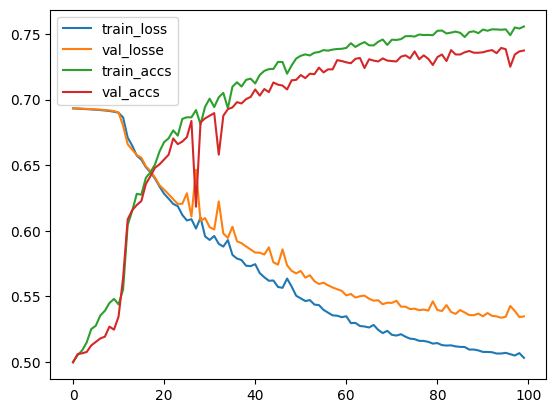

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "train_loss" : train_losses, 
    "val_losse" : val_losses, 
    "train_accs" : train_accs, 
    "val_accs" : val_accs
})

df.plot()       # DataFrame 컬럼들을 한번에 라인 플롯으로 시각화
plt.show()

In [21]:
### Embedding + LSSM

torch.Size([2, 3, 4])
torch.Size([2, 3, 5])
torch.Size([2, 2, 5])
torch.Size([2, 2, 5])


In [24]:
# IMDB 감성분류 LSTM 모델 : 단어 ID 시퀀스를 Embedding으로 변환한 뒤 LSTM을 거쳐 감성 점수를 출력하는 모델
class SentimentNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(      # 단어 ID -> 임베딩 벡터로 변환
            num_embeddings=vocab_size,      # 단어 사전 크기
            embedding_dim=embedding_dim,    # 임베딩 차원(각 차원을 embedding_dim 벡터로 표현)
            padding_idx=0                   # PAD(0) 토큰 임베딩은 업데이트 하지 않는다.
        )
        
        self.lstm = nn.LSTM(
            input_size=embedding_dim,       # 입력 feature 차원
            hidden_size=hidden_dim,          # 은닉 상태 차원
            batch_first=True                # 입력 shape이 (B, T, F) 형태
        )
        self.fc = nn.Linear(hidden_dim,output_dim)  # 마지막 hidden ->  출력(logit)변환
        
    def forward(self,x):
        x = self.embedding(x)                       # (B, T) -> (B, T, E) ㅇㅁ베딩 변환
        output, (hidden,cell) = self.lstm(x)        # output : (B,T,H), hidden/ cell:(1:layers_num,B,H)
        output=self.fc(hidden[-1])                  # 마지막 레이어 hidden (B,H) -> fc 적용
        return output                               # (B,output_dim) 반환
    
embedding_dim = 50          # 임베딩 벡터 차원
hidden_dim = 16             # RNN 은닉차원 수
output_dim = 1              # 이진 분류 출력(logit 1개)
    
model = SentimentNet(vocab_size, embedding_dim, hidden_dim, output_dim)
model

SentimentNet(
  (embedding): Embedding(300, 50, padding_idx=0)
  (lstm): LSTM(50, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [20]:
# RNN 모델 파라미터 (가중치/편향) 이름과 shape 확인
for name, param in model.named_parameters():
    print(name, param.shape)    # 파라미터 이름과 텐서 shape 출력

embedding.weight torch.Size([300, 50])
lstm.weight_ih_l0 torch.Size([64, 50])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [27]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델의 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentNet                             --
├─Embedding: 1-1                         15,000
├─LSTM: 1-2                              6,528
├─Linear: 1-3                            17
Total params: 21,545
Trainable params: 21,545
Non-trainable params: 0

In [23]:

# LSTM 입력/출력 텐서
import torch
import torch.nn as nn

batch_size = 2      # B : 한번에 처리할 샘플(문장) 개수
seq_len = 3         # T : 시퀀스 길이(Time Steps)
input_size = 4      # F : 각 시점이 입력 차원 (vocab_size 또는 임베딩 차원)
hidden_size = 5     # H : RNN의 은닉 상태 차원

x = torch.randn(batch_size, seq_len, input_size)    # 입력 시퀀스 텐서 생성 : (B,T,F)
print(x.shape)

# LSTM 생성 ((B, T, F) 형태로 입력을 받도록 설정)
lstm = nn.LSTM(input_size, hidden_size, batch_first=True, num_layers=2)     # 2층 LSTM 생성
output, (hidden, cell) = lstm(x)     # 순전파 : output(전체 시점 출력), hidden(마지막 은닉)

print(output.shape) # (B, T, H) : 모든 시점의 은닉 출력들이 쌓인 결과
print(hidden.shape) # (Num_layers, B, H)    : 마지막 시점 은닉 상태
print(cell.shape)   # (Num_layers, B, H)    : 마지막 시점 cel state

torch.Size([2, 3, 4])
torch.Size([2, 3, 5])
torch.Size([2, 2, 5])
torch.Size([2, 2, 5])


In [25]:
# IMDB 감성분류 LSTM 모델 (2-layer LSTM)
class SentimentNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=2):
        super().__init__()
        
        self.embedding = nn.Embedding(      # 단어 ID -> 임베딩 벡터로 변환
            num_embeddings=vocab_size,      # 단어 사전 크기
            embedding_dim=embedding_dim,    # 임베딩 차원(각 차원을 embedding_dim 벡터로 표현)
            padding_idx=0                   # PAD(0) 토큰 임베딩은 업데이트 하지 않는다.
        )
        
        self.lstm = nn.LSTM(
            input_size=embedding_dim,       # 입력 feature 차원
            hidden_size=hidden_dim,          # 은닉 상태 차원
            batch_first=True ,               # 입력 shape이 (B, T, F) 형태
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim,output_dim)  # 마지막 hidden ->  출력(logit)변환
        
    def forward(self,x):
        x = self.embedding(x)                       # (B, T) -> (B, T, E) 임베딩 변환
        output, (hidden,cell) = self.lstm(x)        # output : (B,T,H), hidden/ cell:(L:layers_num,B,H)
        output=self.fc(hidden[-1])                  # 마지막 레이어 hidden (B,H) -> fc 적용
        return output                               # (B,output_dim) 반환
    
embedding_dim = 50          # 임베딩 벡터 차원
hidden_dim = 16             # RNN 은닉차원 수
output_dim = 1              # 이진 분류 출력(logit 1개)
    
model = SentimentNet(vocab_size, embedding_dim, hidden_dim, output_dim,num_layers=2)
model

SentimentNet(
  (embedding): Embedding(300, 50, padding_idx=0)
  (lstm): LSTM(50, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [26]:
# RNN 모델 파라미터 (가중치/편향) 이름과 shape 확인
for name, param in model.named_parameters():
    print(name, param.shape)    # 파라미터 이름과 텐서 shape 출력

embedding.weight torch.Size([300, 50])
lstm.weight_ih_l0 torch.Size([64, 50])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
lstm.weight_ih_l1 torch.Size([64, 16])
lstm.weight_hh_l1 torch.Size([64, 16])
lstm.bias_ih_l1 torch.Size([64])
lstm.bias_hh_l1 torch.Size([64])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [28]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델의 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentNet                             --
├─Embedding: 1-1                         15,000
├─LSTM: 1-2                              6,528
├─Linear: 1-3                            17
Total params: 21,545
Trainable params: 21,545
Non-trainable params: 0

파라미터 수에 따른 학습시간 계산에 사용한다. (x 데이터량)

### Emebedding + LSTM(bidirectional)

![](https://d.pr/i/0u69xz+)


**Bidirectional LSTM**은 LSTM의 변형 모델로, **양방향으로 데이터를 처리**할 수 있도록 설계된 구조이다. 일반 LSTM이 입력 데이터를 **순방향(forward)**으로만 처리하는 반면, Bidirectional LSTM은 **순방향**과 **역방향(backward)**으로 데이터를 동시에 처리하여 더 많은 정보를 학습한다.


1. **양방향 정보 학습**  
   - 순방향 LSTM은 이전 시점의 정보만을 사용하여 다음 시점의 출력을 계산한다.
   - Bidirectional LSTM은 데이터의 시간적 흐름을 순방향과 역방향으로 모두 고려하여 **이전**과 **이후**의 정보를 동시에 학습한다.

2. **문맥 정보 강화**  
   - 예를 들어, 텍스트 데이터를 처리할 때 문장의 맥락(Context)을 양방향으로 학습하여 더 정확한 결과를 얻을 수 있다.  
    - 예: "He went to the bank ..."에서 "bank"가 "은행"인지 "강둑"인지 구분하기 위해 이후 단어의 정보를 활용할 수 있다.
    - Forward LSTM:
    ```He → went → to → the → bank → to → withdraw → money```
    - Backward LSTM:
    ```money → withdraw → to → bank → the → to → went → He```

In [ ]:

# LSTM 입력/출력 텐서
import torch
import torch.nn as nn

batch_size = 2      # B : 한번에 처리할 샘플(문장) 개수
seq_len = 3         # T : 시퀀스 길이(Time Steps)
input_size = 4      # F : 각 시점이 입력 차원 (vocab_size 또는 임베딩 차원)
hidden_size = 5     # H : RNN의 은닉 상태 차원

x = torch.randn(batch_size, seq_len, input_size)    # 입력 시퀀스 텐서 생성 : (B,T,F)
print(x.shape)

# LSTM 생성 ((B, T, F) 형태로 입력을 받도록 설정)
lstm = nn.LSTM(
    input_size,             # 입력 feature 차원 F : 각 시점에 들어오는 벡터 크기
    hidden_size,            # 은닉 상태 차원 H : LSTM hidden/cell state 크기
    batch_first=True,       # 입력/출력 텐서 shape을 (B, T, F)로 사용(False : T, B, F 순으로 사용)
    num_layers=1,           # LSTM을 몇 층으로 쌓을지 (2이상이면 Stacked LSTM)
    bidirectional=True)     # 양방향 LSTM 사용 여부(출력 feature가 2H로 concat 됨)
output, (hidden, cell) = lstm(x)     # 순전파 : output(전체 시점 출력), hidden(마지막 은닉)

print(output.shape) # (B, T, H*2) : 모든 시점의 은닉 출력들이 쌓인 결과
print(hidden.shape) # (Num_layers*2, B, H)    : 마지막 시점 은닉 상태
print(cell.shape)   # (Num_layers*2, B, H)    : 마지막 시점 cel state

torch.Size([2, 3, 4])
torch.Size([2, 3, 10])
torch.Size([2, 2, 5])
torch.Size([2, 2, 5])


In [31]:
# IMDB 감성분류 LSTM 모델 : 단어 ID 시퀀스를 Embedding으로 변환한 뒤 BiLSTM(순/역방향)을 거쳐 두 방향을 hidden감성 점수를 출력하는 모델
class SentimentNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1):
        super().__init__()
        
        self.embedding = nn.Embedding(      # 단어 ID -> 임베딩 벡터로 변환
            num_embeddings=vocab_size,      # 단어 사전 크기
            embedding_dim=embedding_dim,    # 임베딩 차원(각 차원을 embedding_dim 벡터로 표현)
            padding_idx=0                   # PAD(0) 토큰 임베딩은 업데이트 하지 않는다.
        )
        
        self.lstm = nn.LSTM(
            input_size=embedding_dim,       # 입력 feature 차원
            hidden_size=hidden_dim,          # 은닉 상태 차원
            batch_first=True,                # 입력 shape이 (B, T, F) 형태
            bidirectional=True
        )
        # 이전 LSTM 출력은 hidden_dim으 2배 : (정방향+역방향) 결합 벡터
        self.fc = nn.Linear(hidden_dim*2,output_dim)  # 마지막 hidden ->  출력(logit)변환 
        
    def forward(self,x):
        x = self.embedding(x)                       # (B, T) -> (B, T, E) ㅇㅁ베딩 변환
        _, (hidden,_) = self.lstm(x)                # hidden: (num_layer*2, B, H) 반환
        forward_pass = hidden[-2]                   # 마지막 레이어의 정방향 hidden:(B,H)
        backward_pass = hidden[-1]                  # 마지막 레이어의 역방향 hidden:(B,H)
        
        hidden = torch.cat((forward_pass, backward_pass),dim=1) # (B,H) + (B,H) -> (B,2H)로 concat
        
        output=self.fc(hidden)                  # 마지막 레이어 hidden (B,2H) -> fc 적용(B,output_dim) 변환
        return output                               # (B,output_dim) 반환
    
embedding_dim = 50          # 임베딩 벡터 차원
hidden_dim = 16             # RNN 은닉차원 수
output_dim = 1              # 이진 분류 출력(logit 1개)
    
model = SentimentNet(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=2)
model

SentimentNet(
  (embedding): Embedding(300, 50, padding_idx=0)
  (lstm): LSTM(50, 16, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [32]:
# RNN 모델 파라미터 (가중치/편향) 이름과 shape 확인
for name, param in model.named_parameters():
    print(name, param.shape)    # 파라미터 이름과 텐서 shape 출력

embedding.weight torch.Size([300, 50])
lstm.weight_ih_l0 torch.Size([64, 50])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
lstm.weight_ih_l0_reverse torch.Size([64, 50])
lstm.weight_hh_l0_reverse torch.Size([64, 16])
lstm.bias_ih_l0_reverse torch.Size([64])
lstm.bias_hh_l0_reverse torch.Size([64])
fc.weight torch.Size([1, 32])
fc.bias torch.Size([1])


In [33]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델의 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentNet                             --
├─Embedding: 1-1                         15,000
├─LSTM: 1-2                              8,704
├─Linear: 1-3                            33
Total params: 23,737
Trainable params: 23,737
Non-trainable params: 0

In [34]:
# 학습/검증/테스트 데이터 분리 및 DataLoader 구성
from torch.utils.data import random_split, DataLoader, TensorDataset

batch_size = 64                                 # 미니배치 크기
train_size = int(len(X_train_padded)* 0.8)      # 학습 데이터 개수 (80%)
val_size = len(X_train_padded) - train_size      # 검증 데이터 개수 (20%

# 학습/검증 데이터 셋 분리
train_dataset , val_dataset = random_split(TensorDataset(X_train_padded, y_train), [train_size, val_size])
test_dataset = TensorDataset(X_test_padded, y_test)     # 테스트 입력/라벨을 하나의 DataSet으로 묶음

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)   # 학습용 : 섞어서 배치 생성
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)      # 검증용 : 순서 유지
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)    # 테스트용 : 순서 유지

학습시 X_*_padded(단어 ID 텐서)가 Embedding입력으로 들어간다.

In [35]:
from tqdm import tqdm
import torch.optim as optim     # 최적화 알고리즘       (Adam 등)

# GPU 활용 가능시 GPU 기반으로 RNN 학습 루프(BCEWithLogits + Adam + Early Stopping)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

# 메모리 캐시 정리
torch.cuda.empty_cache()

model = model.to(device)

criterion = nn.BCEWithLogitsLoss()                      # 이진문류 손실 (시그모이드 포함 logit 입력용)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

epochs = 100

# 시각화를 위한 loss 기록
train_losses, val_losses, train_accs, val_accs = [], [], [], []

# 조기종료 관련
early_stopping_patience = 20
best_val_loss = float('inf')
early_stopping_counter = 0

for epoch in tqdm(range(epochs)):
    total_loss, correct, total = 0, 0, 0    # 누적 손실, 정답, 전체 샘플 수
    
    model.train()
    for inputs, labels in train_dataloader:
        # 학습 입력(ID 시퀀스)/라벨을 device로 이돌
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()               # 이전 배치 기울기 초기화
        output = model(inputs)              # 순전파
        loss = criterion(output, labels)    # 손실계산
        loss.backward()                     # 역전파
        optimizer.step()                    # 파라미터 업데이트
        
        # 배치 로그
        total_loss += loss.item()                   # 배치 손실을 스칼라로 누적
        p = torch.sigmoid(output)                   # logit -> 0~1 확률로 변환
        pred = (p>=0.5).float()
        correct += (pred == labels).sum().item()    # 맞춘 개수
        total += labels.size(0)                     # 배치 샘플 수
    
    # 에폭 로그
    train_loss = total_loss / len(train_dataloader) # 에폭별 평균 학습 손실
    train_losses.append(train_loss)
    train_acc = correct/total
    train_accs.append(train_acc)
    
    # 검증
    model.eval()                                # 평가 모드 (Dropout, BN 비활성화)
    val_loss, val_correct, val_total = 0,0,0    # 누적 손실, 정답, 전체 샘플 수
    with torch.no_grad():                       # 기울기 계산 비활성화
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            
            output = model(val_inputs)
            loss = criterion(output,val_labels)
            
            # 배치 로그
            val_loss += loss.item()
            p = torch.sigmoid(output)
            pred = (p>=0.5).float()
            val_correct += (pred == val_labels).sum().item()
            val_total += val_labels.size(0)
        
        # 에폭 로그
        val_loss = val_loss / len(val_dataloader)
        val_losses.append(val_loss)
        val_acc = val_correct/val_total
        val_accs.append(val_acc)
        
        # 에폭 로그 출력
        print(f"Epoch {epoch + 1}/{epochs}: Train Loss {train_loss:.4f} Train Acc {train_acc:.4f} Val loss {val_loss:4f} val acc {val_acc:4f}")
        
        # 조기 종료
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"Early stopped at Epoch {epoch +1}")
                break
            

device cpu


  1%|          | 1/100 [00:01<03:08,  1.90s/it]

Epoch 1/100: Train Loss 0.6954 Train Acc 0.4961 Val loss 0.694762 val acc 0.508667


  2%|▏         | 2/100 [00:03<03:03,  1.87s/it]

Epoch 2/100: Train Loss 0.6939 Train Acc 0.5016 Val loss 0.693879 val acc 0.504000


  3%|▎         | 3/100 [00:05<02:59,  1.85s/it]

Epoch 3/100: Train Loss 0.6931 Train Acc 0.5060 Val loss 0.693251 val acc 0.509000


  4%|▍         | 4/100 [00:07<03:02,  1.90s/it]

Epoch 4/100: Train Loss 0.6924 Train Acc 0.5134 Val loss 0.692684 val acc 0.516000


  5%|▌         | 5/100 [00:09<03:08,  1.99s/it]

Epoch 5/100: Train Loss 0.6917 Train Acc 0.5221 Val loss 0.692177 val acc 0.521667


  6%|▌         | 6/100 [00:11<03:04,  1.96s/it]

Epoch 6/100: Train Loss 0.6910 Train Acc 0.5272 Val loss 0.691594 val acc 0.527667


  7%|▋         | 7/100 [00:13<03:02,  1.96s/it]

Epoch 7/100: Train Loss 0.6902 Train Acc 0.5373 Val loss 0.690894 val acc 0.529000


  8%|▊         | 8/100 [00:15<03:05,  2.02s/it]

Epoch 8/100: Train Loss 0.6892 Train Acc 0.5477 Val loss 0.689989 val acc 0.537000


  9%|▉         | 9/100 [00:17<03:05,  2.04s/it]

Epoch 9/100: Train Loss 0.6879 Train Acc 0.5503 Val loss 0.688810 val acc 0.538333


 10%|█         | 10/100 [00:19<03:02,  2.03s/it]

Epoch 10/100: Train Loss 0.6861 Train Acc 0.5629 Val loss 0.686971 val acc 0.543333


 11%|█         | 11/100 [00:21<03:02,  2.05s/it]

Epoch 11/100: Train Loss 0.6838 Train Acc 0.5699 Val loss 0.685408 val acc 0.546333


 12%|█▏        | 12/100 [00:23<03:00,  2.05s/it]

Epoch 12/100: Train Loss 0.6811 Train Acc 0.5707 Val loss 0.683857 val acc 0.544333


 13%|█▎        | 13/100 [00:26<03:00,  2.08s/it]

Epoch 13/100: Train Loss 0.6777 Train Acc 0.5808 Val loss 0.680821 val acc 0.556000


 14%|█▍        | 14/100 [00:28<03:03,  2.14s/it]

Epoch 14/100: Train Loss 0.6740 Train Acc 0.5853 Val loss 0.678060 val acc 0.562333


 15%|█▌        | 15/100 [00:30<03:00,  2.12s/it]

Epoch 15/100: Train Loss 0.6698 Train Acc 0.5934 Val loss 0.677333 val acc 0.569667


 16%|█▌        | 16/100 [00:32<03:01,  2.16s/it]

Epoch 16/100: Train Loss 0.6659 Train Acc 0.6039 Val loss 0.674463 val acc 0.574667


 17%|█▋        | 17/100 [00:34<03:02,  2.20s/it]

Epoch 17/100: Train Loss 0.6614 Train Acc 0.6089 Val loss 0.670992 val acc 0.580667


 18%|█▊        | 18/100 [00:37<03:03,  2.24s/it]

Epoch 18/100: Train Loss 0.6570 Train Acc 0.6134 Val loss 0.668347 val acc 0.590333


 19%|█▉        | 19/100 [00:39<03:02,  2.25s/it]

Epoch 19/100: Train Loss 0.6531 Train Acc 0.6181 Val loss 0.665562 val acc 0.597333


 20%|██        | 20/100 [00:41<03:01,  2.26s/it]

Epoch 20/100: Train Loss 0.6491 Train Acc 0.6269 Val loss 0.663613 val acc 0.601000


 21%|██        | 21/100 [00:44<03:01,  2.30s/it]

Epoch 21/100: Train Loss 0.6451 Train Acc 0.6307 Val loss 0.662589 val acc 0.605333


 22%|██▏       | 22/100 [00:46<02:58,  2.28s/it]

Epoch 22/100: Train Loss 0.6416 Train Acc 0.6341 Val loss 0.658898 val acc 0.607667


 23%|██▎       | 23/100 [00:48<02:56,  2.29s/it]

Epoch 23/100: Train Loss 0.6379 Train Acc 0.6381 Val loss 0.655804 val acc 0.617000


 24%|██▍       | 24/100 [00:51<02:52,  2.27s/it]

Epoch 24/100: Train Loss 0.6326 Train Acc 0.6456 Val loss 0.656873 val acc 0.615333


 25%|██▌       | 25/100 [00:53<02:51,  2.28s/it]

Epoch 25/100: Train Loss 0.6288 Train Acc 0.6480 Val loss 0.652353 val acc 0.619667


 26%|██▌       | 26/100 [00:55<02:50,  2.30s/it]

Epoch 26/100: Train Loss 0.6246 Train Acc 0.6536 Val loss 0.648760 val acc 0.624333


 27%|██▋       | 27/100 [00:57<02:45,  2.27s/it]

Epoch 27/100: Train Loss 0.6212 Train Acc 0.6579 Val loss 0.647975 val acc 0.624333


 28%|██▊       | 28/100 [01:00<02:43,  2.28s/it]

Epoch 28/100: Train Loss 0.6186 Train Acc 0.6604 Val loss 0.647648 val acc 0.620333


 29%|██▉       | 29/100 [01:02<02:41,  2.27s/it]

Epoch 29/100: Train Loss 0.6134 Train Acc 0.6677 Val loss 0.642755 val acc 0.634000


 30%|███       | 30/100 [01:04<02:38,  2.27s/it]

Epoch 30/100: Train Loss 0.6095 Train Acc 0.6703 Val loss 0.640174 val acc 0.633333


 31%|███       | 31/100 [01:06<02:36,  2.27s/it]

Epoch 31/100: Train Loss 0.6058 Train Acc 0.6737 Val loss 0.637523 val acc 0.635333


 32%|███▏      | 32/100 [01:09<02:35,  2.29s/it]

Epoch 32/100: Train Loss 0.6019 Train Acc 0.6783 Val loss 0.637474 val acc 0.635667


 33%|███▎      | 33/100 [01:11<02:31,  2.27s/it]

Epoch 33/100: Train Loss 0.5976 Train Acc 0.6805 Val loss 0.636401 val acc 0.641667


 34%|███▍      | 34/100 [01:13<02:28,  2.24s/it]

Epoch 34/100: Train Loss 0.5938 Train Acc 0.6830 Val loss 0.630406 val acc 0.641667


 35%|███▌      | 35/100 [01:16<02:27,  2.28s/it]

Epoch 35/100: Train Loss 0.5901 Train Acc 0.6910 Val loss 0.628468 val acc 0.643667


 36%|███▌      | 36/100 [01:18<02:24,  2.26s/it]

Epoch 36/100: Train Loss 0.5856 Train Acc 0.6927 Val loss 0.624534 val acc 0.647667


 37%|███▋      | 37/100 [01:20<02:22,  2.25s/it]

Epoch 37/100: Train Loss 0.5821 Train Acc 0.6954 Val loss 0.624759 val acc 0.650000


 38%|███▊      | 38/100 [01:22<02:20,  2.27s/it]

Epoch 38/100: Train Loss 0.5787 Train Acc 0.6991 Val loss 0.622523 val acc 0.652667


 39%|███▉      | 39/100 [01:25<02:18,  2.26s/it]

Epoch 39/100: Train Loss 0.5745 Train Acc 0.7026 Val loss 0.618281 val acc 0.657000


 40%|████      | 40/100 [01:27<02:14,  2.24s/it]

Epoch 40/100: Train Loss 0.5707 Train Acc 0.7070 Val loss 0.615948 val acc 0.659667


 41%|████      | 41/100 [01:29<02:12,  2.25s/it]

Epoch 41/100: Train Loss 0.5656 Train Acc 0.7077 Val loss 0.611942 val acc 0.659000


 42%|████▏     | 42/100 [01:31<02:10,  2.25s/it]

Epoch 42/100: Train Loss 0.5610 Train Acc 0.7131 Val loss 0.607879 val acc 0.665667


 43%|████▎     | 43/100 [01:34<02:07,  2.24s/it]

Epoch 43/100: Train Loss 0.5577 Train Acc 0.7173 Val loss 0.605207 val acc 0.670667


 44%|████▍     | 44/100 [01:36<02:07,  2.28s/it]

Epoch 44/100: Train Loss 0.5528 Train Acc 0.7198 Val loss 0.606223 val acc 0.673000


 45%|████▌     | 45/100 [01:38<02:04,  2.26s/it]

Epoch 45/100: Train Loss 0.5501 Train Acc 0.7222 Val loss 0.602259 val acc 0.672333


 46%|████▌     | 46/100 [01:40<02:03,  2.28s/it]

Epoch 46/100: Train Loss 0.5471 Train Acc 0.7244 Val loss 0.601388 val acc 0.673333


 47%|████▋     | 47/100 [01:43<01:59,  2.26s/it]

Epoch 47/100: Train Loss 0.5440 Train Acc 0.7271 Val loss 0.599893 val acc 0.678333


 48%|████▊     | 48/100 [01:45<01:57,  2.27s/it]

Epoch 48/100: Train Loss 0.5407 Train Acc 0.7302 Val loss 0.600923 val acc 0.676667


 49%|████▉     | 49/100 [01:47<01:56,  2.27s/it]

Epoch 49/100: Train Loss 0.5387 Train Acc 0.7323 Val loss 0.597134 val acc 0.684000


 50%|█████     | 50/100 [01:49<01:53,  2.26s/it]

Epoch 50/100: Train Loss 0.5344 Train Acc 0.7342 Val loss 0.597256 val acc 0.684333


 51%|█████     | 51/100 [01:52<01:51,  2.27s/it]

Epoch 51/100: Train Loss 0.5327 Train Acc 0.7348 Val loss 0.594363 val acc 0.688667


 52%|█████▏    | 52/100 [01:54<01:48,  2.27s/it]

Epoch 52/100: Train Loss 0.5318 Train Acc 0.7365 Val loss 0.594320 val acc 0.689667


 53%|█████▎    | 53/100 [01:56<01:46,  2.27s/it]

Epoch 53/100: Train Loss 0.5282 Train Acc 0.7392 Val loss 0.593338 val acc 0.688333


 54%|█████▍    | 54/100 [01:59<01:46,  2.31s/it]

Epoch 54/100: Train Loss 0.5263 Train Acc 0.7414 Val loss 0.592753 val acc 0.689667


 55%|█████▌    | 55/100 [02:01<01:43,  2.31s/it]

Epoch 55/100: Train Loss 0.5244 Train Acc 0.7406 Val loss 0.591101 val acc 0.688667


 56%|█████▌    | 56/100 [02:03<01:42,  2.33s/it]

Epoch 56/100: Train Loss 0.5212 Train Acc 0.7446 Val loss 0.593055 val acc 0.692667


 57%|█████▋    | 57/100 [02:06<01:39,  2.32s/it]

Epoch 57/100: Train Loss 0.5183 Train Acc 0.7455 Val loss 0.590001 val acc 0.692333


 58%|█████▊    | 58/100 [02:08<01:37,  2.32s/it]

Epoch 58/100: Train Loss 0.5160 Train Acc 0.7474 Val loss 0.590078 val acc 0.695333


 59%|█████▉    | 59/100 [02:10<01:33,  2.29s/it]

Epoch 59/100: Train Loss 0.5157 Train Acc 0.7478 Val loss 0.588490 val acc 0.694333


 60%|██████    | 60/100 [02:13<01:32,  2.31s/it]

Epoch 60/100: Train Loss 0.5135 Train Acc 0.7491 Val loss 0.589540 val acc 0.688667


 61%|██████    | 61/100 [02:15<01:29,  2.30s/it]

Epoch 61/100: Train Loss 0.5126 Train Acc 0.7506 Val loss 0.587823 val acc 0.695000


 62%|██████▏   | 62/100 [02:17<01:27,  2.30s/it]

Epoch 62/100: Train Loss 0.5101 Train Acc 0.7523 Val loss 0.588457 val acc 0.697333


 63%|██████▎   | 63/100 [02:19<01:24,  2.29s/it]

Epoch 63/100: Train Loss 0.5084 Train Acc 0.7553 Val loss 0.585137 val acc 0.693333


 64%|██████▍   | 64/100 [02:22<01:24,  2.36s/it]

Epoch 64/100: Train Loss 0.5054 Train Acc 0.7542 Val loss 0.591087 val acc 0.695333


 65%|██████▌   | 65/100 [02:24<01:22,  2.37s/it]

Epoch 65/100: Train Loss 0.5044 Train Acc 0.7583 Val loss 0.586537 val acc 0.695667


 66%|██████▌   | 66/100 [02:27<01:21,  2.39s/it]

Epoch 66/100: Train Loss 0.5025 Train Acc 0.7577 Val loss 0.584188 val acc 0.699667


 67%|██████▋   | 67/100 [02:29<01:18,  2.37s/it]

Epoch 67/100: Train Loss 0.5002 Train Acc 0.7592 Val loss 0.585265 val acc 0.697333


 68%|██████▊   | 68/100 [02:31<01:15,  2.35s/it]

Epoch 68/100: Train Loss 0.4994 Train Acc 0.7614 Val loss 0.585120 val acc 0.697000


 69%|██████▉   | 69/100 [02:34<01:11,  2.32s/it]

Epoch 69/100: Train Loss 0.4970 Train Acc 0.7616 Val loss 0.586729 val acc 0.699333


 70%|███████   | 70/100 [02:36<01:07,  2.27s/it]

Epoch 70/100: Train Loss 0.4972 Train Acc 0.7632 Val loss 0.587127 val acc 0.698333


 71%|███████   | 71/100 [02:38<01:06,  2.28s/it]

Epoch 71/100: Train Loss 0.4945 Train Acc 0.7600 Val loss 0.583728 val acc 0.702000


 72%|███████▏  | 72/100 [02:40<01:03,  2.26s/it]

Epoch 72/100: Train Loss 0.4940 Train Acc 0.7619 Val loss 0.584660 val acc 0.699667


 73%|███████▎  | 73/100 [02:43<01:01,  2.26s/it]

Epoch 73/100: Train Loss 0.4910 Train Acc 0.7653 Val loss 0.583725 val acc 0.700333


 74%|███████▍  | 74/100 [02:45<00:57,  2.23s/it]

Epoch 74/100: Train Loss 0.4904 Train Acc 0.7648 Val loss 0.586439 val acc 0.702333


 75%|███████▌  | 75/100 [02:47<00:57,  2.29s/it]

Epoch 75/100: Train Loss 0.4883 Train Acc 0.7673 Val loss 0.582292 val acc 0.702667


 76%|███████▌  | 76/100 [02:49<00:54,  2.29s/it]

Epoch 76/100: Train Loss 0.4878 Train Acc 0.7679 Val loss 0.582759 val acc 0.700000


 77%|███████▋  | 77/100 [02:52<00:52,  2.27s/it]

Epoch 77/100: Train Loss 0.4874 Train Acc 0.7674 Val loss 0.582133 val acc 0.700667


 78%|███████▊  | 78/100 [02:54<00:49,  2.26s/it]

Epoch 78/100: Train Loss 0.4877 Train Acc 0.7652 Val loss 0.599349 val acc 0.693333


 79%|███████▉  | 79/100 [02:56<00:46,  2.22s/it]

Epoch 79/100: Train Loss 0.4960 Train Acc 0.7642 Val loss 0.585801 val acc 0.701333


 80%|████████  | 80/100 [02:58<00:43,  2.20s/it]

Epoch 80/100: Train Loss 0.4849 Train Acc 0.7696 Val loss 0.586280 val acc 0.699667


 81%|████████  | 81/100 [03:00<00:41,  2.19s/it]

Epoch 81/100: Train Loss 0.4839 Train Acc 0.7689 Val loss 0.581388 val acc 0.700333


 82%|████████▏ | 82/100 [03:03<00:39,  2.21s/it]

Epoch 82/100: Train Loss 0.4826 Train Acc 0.7736 Val loss 0.583355 val acc 0.702000


 83%|████████▎ | 83/100 [03:05<00:37,  2.19s/it]

Epoch 83/100: Train Loss 0.4793 Train Acc 0.7748 Val loss 0.585128 val acc 0.700000


 84%|████████▍ | 84/100 [03:07<00:36,  2.29s/it]

Epoch 84/100: Train Loss 0.4805 Train Acc 0.7714 Val loss 0.583647 val acc 0.704667


 85%|████████▌ | 85/100 [03:10<00:34,  2.33s/it]

Epoch 85/100: Train Loss 0.4788 Train Acc 0.7743 Val loss 0.583291 val acc 0.702667


 86%|████████▌ | 86/100 [03:12<00:32,  2.32s/it]

Epoch 86/100: Train Loss 0.4774 Train Acc 0.7755 Val loss 0.581734 val acc 0.704333


 87%|████████▋ | 87/100 [03:14<00:29,  2.31s/it]

Epoch 87/100: Train Loss 0.4744 Train Acc 0.7769 Val loss 0.583775 val acc 0.704333


 88%|████████▊ | 88/100 [03:17<00:27,  2.29s/it]

Epoch 88/100: Train Loss 0.4719 Train Acc 0.7770 Val loss 0.581589 val acc 0.706333


 89%|████████▉ | 89/100 [03:19<00:25,  2.31s/it]

Epoch 89/100: Train Loss 0.4716 Train Acc 0.7777 Val loss 0.580248 val acc 0.708667


 90%|█████████ | 90/100 [03:21<00:22,  2.29s/it]

Epoch 90/100: Train Loss 0.4712 Train Acc 0.7764 Val loss 0.581279 val acc 0.706667


 91%|█████████ | 91/100 [03:24<00:20,  2.32s/it]

Epoch 91/100: Train Loss 0.4701 Train Acc 0.7758 Val loss 0.582365 val acc 0.710000


 92%|█████████▏| 92/100 [03:26<00:18,  2.30s/it]

Epoch 92/100: Train Loss 0.4686 Train Acc 0.7778 Val loss 0.581539 val acc 0.706333


 93%|█████████▎| 93/100 [03:28<00:16,  2.32s/it]

Epoch 93/100: Train Loss 0.4668 Train Acc 0.7791 Val loss 0.581105 val acc 0.709000


 94%|█████████▍| 94/100 [03:30<00:13,  2.32s/it]

Epoch 94/100: Train Loss 0.4660 Train Acc 0.7799 Val loss 0.584474 val acc 0.708000


 95%|█████████▌| 95/100 [03:33<00:11,  2.35s/it]

Epoch 95/100: Train Loss 0.4639 Train Acc 0.7812 Val loss 0.586761 val acc 0.708667


 96%|█████████▌| 96/100 [03:35<00:09,  2.34s/it]

Epoch 96/100: Train Loss 0.4648 Train Acc 0.7787 Val loss 0.582390 val acc 0.707667


 97%|█████████▋| 97/100 [03:38<00:07,  2.34s/it]

Epoch 97/100: Train Loss 0.4616 Train Acc 0.7818 Val loss 0.583560 val acc 0.709667


 98%|█████████▊| 98/100 [03:40<00:04,  2.33s/it]

Epoch 98/100: Train Loss 0.4603 Train Acc 0.7828 Val loss 0.586534 val acc 0.707333


 99%|█████████▉| 99/100 [03:42<00:02,  2.33s/it]

Epoch 99/100: Train Loss 0.4590 Train Acc 0.7838 Val loss 0.586715 val acc 0.707667


100%|██████████| 100/100 [03:45<00:00,  2.25s/it]

Epoch 100/100: Train Loss 0.4583 Train Acc 0.7835 Val loss 0.584482 val acc 0.710667


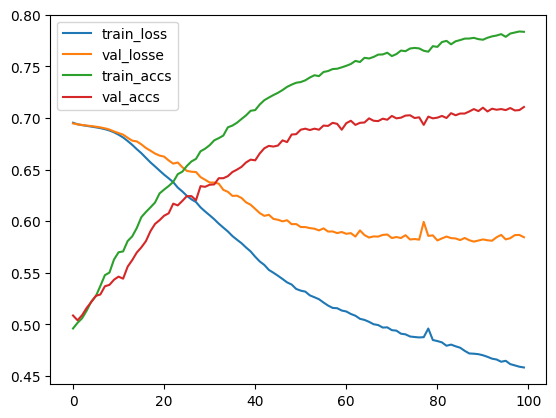

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "train_loss" : train_losses, 
    "val_losse" : val_losses, 
    "train_accs" : train_accs, 
    "val_accs" : val_accs
})

df.plot()       # DataFrame 컬럼들을 한번에 라인 플롯으로 시각화
plt.show()